In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split

print("Bibliotecas carregadas com sucesso!")

Bibliotecas carregadas!


In [4]:
# Fazer upload do arquivo
print("Por favor, faça o upload do arquivo iris.csv")
uploaded = files.upload()
filename = next(iter(uploaded))

# Carregar os dados
df = pd.read_csv(filename)

# Verificar os nomes das colunas
print("\nColunas no dataset:", df.columns.tolist())
print("\nPrimeiras linhas:")
print(df.head())

Por favor, faça o upload do arquivo iris.csv


Saving iris.csv to iris (1).csv

Colunas no dataset: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

Primeiras linhas:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [5]:
# Separar features e target
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = df['variety']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nDados preparados:")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
print("\nClasses únicas:", y.unique())


Dados preparados:
Treino: 105 amostras
Teste: 45 amostras

Classes únicas: ['Setosa' 'Versicolor' 'Virginica']


In [6]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

print("\nModelo treinado com sucesso!")
print(f"Acurácia no treino: {model.score(X_train, y_train):.2f}")
print(f"Acurácia no teste: {model.score(X_test, y_test):.2f}")


Modelo treinado com sucesso!
Acurácia no treino: 0.95
Acurácia no teste: 1.00


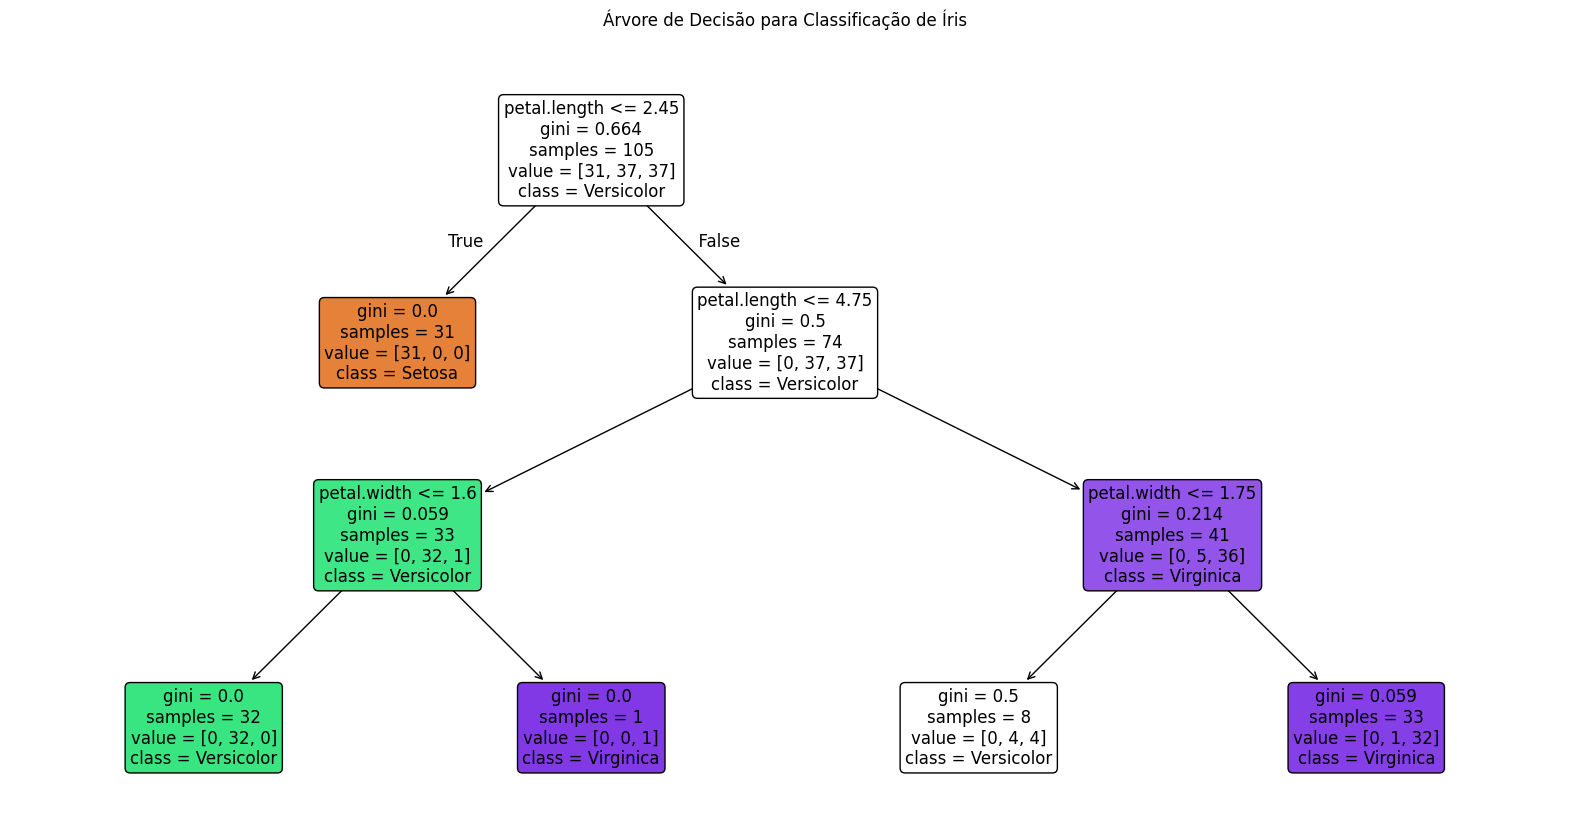

In [7]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Árvore de Decisão para Classificação de Íris", pad=20)
plt.show()

In [8]:
rules = export_text(
    model,
    feature_names=X.columns.tolist(),
    decimals=2
)

print("\n═"*50)
print(" REGRAS DE CLASSIFICAÇÃO ".center(50, '═'))
print("═"*50)

print("\nPrincipais regras de decisão:")
print("1. A primeira divisão é pelo comprimento da pétala (petal.length):")
print("   - Se ≤ 2.45 cm → Setosa")
print("\n2. Para flores com pétalas > 2.45 cm, a próxima divisão é pela largura da pétala (petal.width):")
print("   - Se ≤ 1.75 cm → Versicolor")
print("   - Se > 1.75 cm → Virginica")

print("\nRegras completas:\n")
print(rules)


═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
════════════ REGRAS DE CLASSIFICAÇÃO ═════════════
══════════════════════════════════════════════════

Principais regras de decisão:
1. A primeira divisão é pelo comprimento da pétala (petal.length):
   - Se ≤ 2.45 cm → Setosa

2. Para flores com pétalas > 2.45 cm, a próxima divisão é pela largura da pétala (petal.width):
   - Se ≤ 1.75 cm → Versicolor
   - Se > 1.75 cm → Virginica

Regras completas:

|--- petal.length <= 2.45
|   |--- class: Setosa
|--- petal.length >  2.45
|   |--- petal.length <= 4.75
|   |   |--- petal.width <= 1.60
|   |   |   |--- class: Versicolor
|   |   |--- petal.width >  1.60
|   |   |   |--- class: Virginica
|   |--- petal.length >  4.75
|   |   |--- petal.width <= 1.75
|   |   |   |--- class: Versicolor
|   |   |--- petal.width >  1.75
|   |   |   |--- class: Virginica



In [9]:
print("\n═"*50)
print(" IMPORTÂNCIA DAS CARACTERÍSTICAS ".center(50, '═'))
print("═"*50)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance.to_string(index=False))

print("\nConclusões:")
print("- O comprimento da pétala (petal.length) é o fator mais importante")
print("- A largura da pétala (petal.width) também tem grande influência")
print("- As características da sépala têm menor impacto na classificação")


═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
═
════════ IMPORTÂNCIA DAS CARACTERÍSTICAS ═════════
══════════════════════════════════════════════════
     Feature  Importance
petal.length    0.925108
 petal.width    0.074892
 sepal.width    0.000000
sepal.length    0.000000

Conclusões:
- O comprimento da pétala (petal.length) é o fator mais importante
- A largura da pétala (petal.width) também tem grande influência
- As características da sépala têm menor impacto na classificação
